<a href="https://colab.research.google.com/github/alexnaoki/UFMS-heros/blob/main/03_Xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xarray[complete]

     |████████████████████████████████| 45 kB 1.6 MB/s 
     |████████████████████████████████| 2.3 MB 9.3 MB/s 
     |████████████████████████████████| 136 kB 52.8 MB/s 
     |████████████████████████████████| 19.3 MB 4.4 MB/s 
     |████████████████████████████████| 153 kB 52.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 837 kB 20.6 MB/s 
     |████████████████████████████████| 830 kB 40.0 MB/s 
     |████████████████████████████████| 822 kB 50.0 MB/s 
     |████████████████████████████████| 802 kB 44.9 MB/s 
     |████████████████████████████████| 802 kB 48.8 MB/s 
     |████████████████████████████████| 793 kB 35.4 MB/s 
     |████████████████████████████████| 793 kB 47.1 MB/s 
     |████████████████████████████████| 791 kB 43.9 MB/s 
     |████████████████████████████████| 786 kB 32.8 MB/s 
     |████████████████████████████████| 779 kB 46.6 MB/s 
     |████████████████████████████████| 778 kB 44.1 MB/s 
     |█████████████

# Import libraries

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [ ]:
xr.__version__

'0.18.2'

## Downloading data

In [ ]:
for yr in range(2011, 2013):
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    savename = url.split('/')[-1]
    urllib.request.urlretrieve(url,savename)

# Open NetCDF file

In [ ]:
ds2011 = xr.open_dataset('precip.V1.0.2011.nc')
ds2012 = xr.open_dataset('precip.V1.0.2012.nc')

In [ ]:
ds2011

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

# Dataset selecting data

DATASET**.sel( )** x DATAARRAY**.sel( )**

In [ ]:
ds2012.sel(time='2012-01-01')

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
    time     datetime64[ns] 2012-01-01
Data variables:
    precip   (lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

## Dataset -> Dataarray

In [ ]:
ds2012.sel(time='2012-01-01')['precip']

<xarray.DataArray 'precip' (lat: 120, lon: 300)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
    time     datetime64[ns] 2012-01-01
Attributes:
    long_name:     Daily Accumulated Precipitation
    valid_range:   [  0. 700.]
    units:         mm
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    statistic:     Daily Accumulation
    parent_stat:   Observation
    actual_range:  [  0.      304.60495]

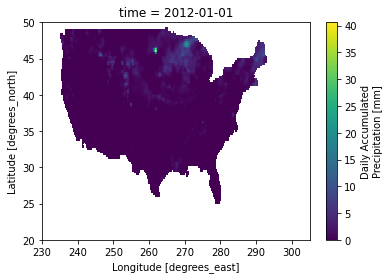

In [ ]:
ds2012.sel(time='2012-01-01')['precip'].plot()

# Basic usage similar to Pandas

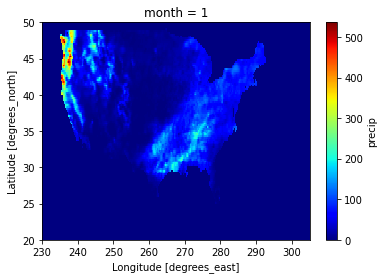

In [ ]:
ds2012_month = ds2012.groupby(ds2012.time.dt.month).sum()
ds2012_month.sel(month=1)['precip'].plot(cmap='jet')

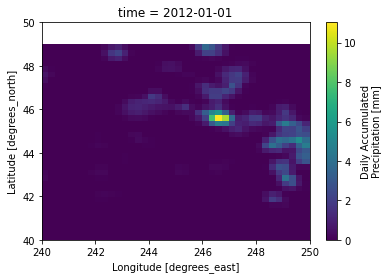

In [ ]:
top = 50
bottom = 40
left = 240
right = 250

ds2012.sel(lat=slice(bottom, top),
           lon=slice(left, right),
           time='2012-01-01')['precip'].plot()

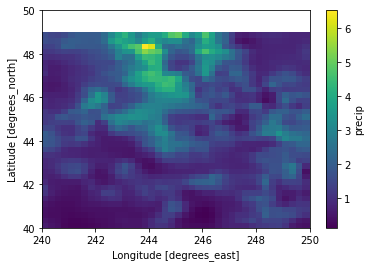

In [ ]:
ds2012.sel(lat=slice(bottom, top),
           lon=slice(left, right)).mean('time')['precip'].plot()

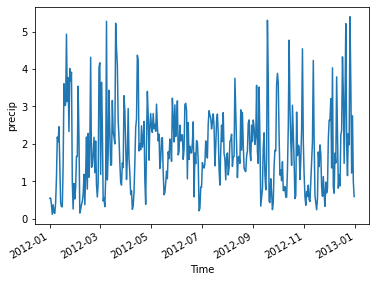

In [ ]:
ds2012.mean(dim=('lat', 'lon'))['precip'].plot()

In [ ]:
ds2012['precip_teste'] = ds2012['precip']*2-10

## "Stacking" processes into the same line

#### Dataset -> Groupby Dataset object (mean) -> DataArray -> mean (lat,lon)

In [ ]:
ds2012.groupby(ds2012['time'].dt.month)

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

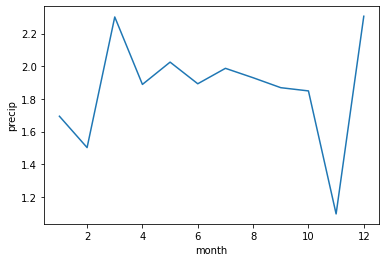

In [ ]:
ds2012.groupby(ds2012['time'].dt.month).mean()['precip'].mean(('lat','lon')).plot()

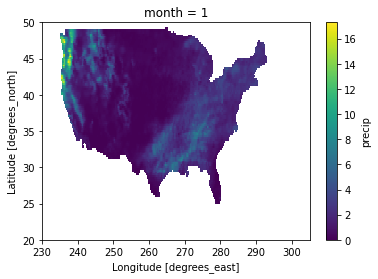

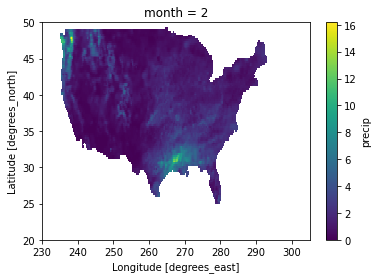

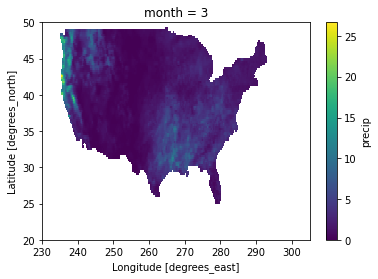

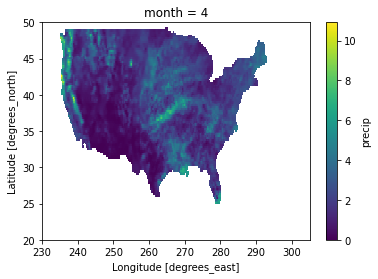

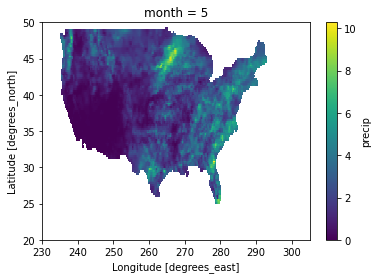

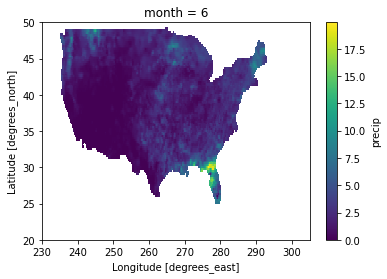

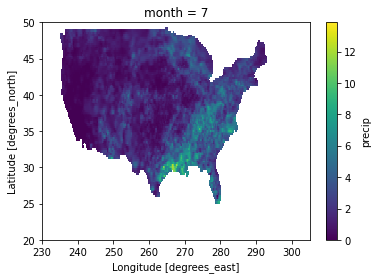

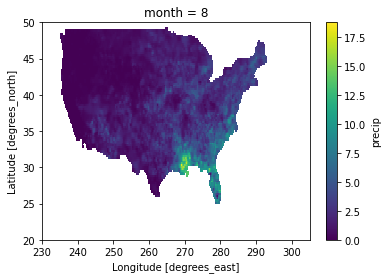

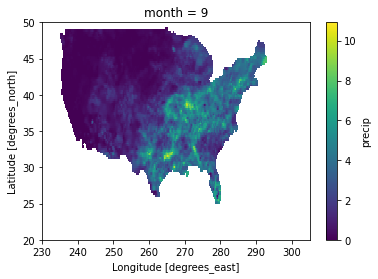

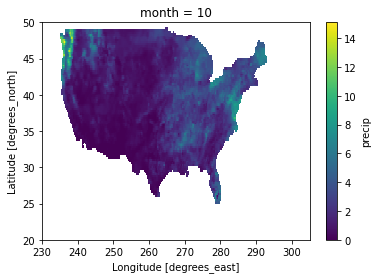

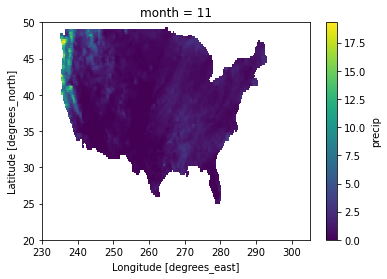

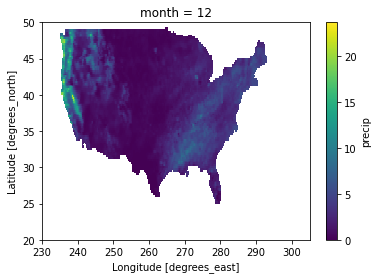

In [ ]:
for month in range(1,13):
    ds2012.groupby(ds2012['time'].dt.month).mean()['precip'].sel(month=month).plot()
    plt.show()